## Linear Operations using Numpy

You will be dealing with _**a lot**_ of maths (linear algebra) later on in this subject. As such, `numpy` will be your best friend sooner or later.

With that, in this demo, we will go through some linear algebra operations using numpy.

In [1]:
import numpy as np

### Linear Systems with Numpy

In this section, we start with a simple exercise of solving some linear systems using numpy. Consider the following system:

$$
-2x_2 + 3x_3 = 1 \\
3x_1 + 6x_2 - 3x_3 = -2 \\
6x_1 + 6x_2 + 3x_3 = 5
$$

Elementary Linear Algebra, p. 23

In [2]:
A = np.array([[0, -2, 3],[3, 6, -3], [6, 6, 3]])
b = np.array([1, -2, 5])

print(A, b)

[[ 0 -2  3]
 [ 3  6 -3]
 [ 6  6  3]] [ 1 -2  5]


With numpy, you can actually solve this system using one function, `linalg.solve()`.

In [3]:
print(np.linalg.solve(A, b))

[ 2.40191980e+16 -1.80143985e+16 -1.20095990e+16]


On another note, you can also solve this sytem using inverse `inv()` function.

$$
\textrm{A}x = \textrm{b}\\
x = \textrm{A}^{-1}b
$$

In [24]:
print(np.linalg.inv(A).dot(b))
print(np.dot(np.linalg.inv(A), b))

[ 2.40191980e+16 -1.80143985e+16 -1.20095990e+16]
[ 2.40191980e+16 -1.80143985e+16 -1.20095990e+16]


### Numpy Simulation of Attention

When we discuss transformers later on, one of the equations or terms you'll encounter is attention.

$$
Attention(Q,K,V) = \textrm{softmax}(\frac{QK^T}{\sqrt(d_k)})V
$$

$Q$, $K$ and $V$ variables in the equation are the _query_, _key_ and _vector_ matrices, respectively. And put simply, attention is like a scoring function which tells your neural model where to "pay attention" to based on these matrix values.

In this section, we try to simulate and visualize _attention_ by using numpy functions.

In [4]:
import numpy as np

Consider that each of the vectors below are simple embeddings to each word in a random 3-word sentence.

We concatenate those vectors to form our sentence matrix, _words_, where each row correspond to a word in our sentence.

In [5]:
rng = np.random.default_rng(0)

word_1 = rng.uniform(-1, 1, (1,4))
word_2 = rng.uniform(-1, 1, (1,4))
word_3 = rng.uniform(-1, 1, (1,4))
words = np.concatenate((word_1, word_2, word_3), axis=0)

print(words)

[[ 0.27392337 -0.46042657 -0.91805295 -0.96694473]
 [ 0.62654048  0.82551115  0.21327155  0.45899312]
 [ 0.08724998  0.87014485  0.63170711 -0.994523  ]]


Unlike RNNs which take each of these vectors sequentially, transformers take the entire matrix at once. While this can speed up computation, a problem, however, is they lose information order which is important whether you're processing texts, images, or audio.

To address this, transformers require position embeddings. The idea is that these position embeddings will help the model track input positions, and overall give the sequence information. For our position encoder, we consider the following:

$$
\textrm{PE}_{(\textrm{pos},2i)} = \sin\Biggl(\frac{\textrm{pos}}{10000^{\frac{2i}{d}}}\Biggr)
$$

$$
\textrm{PE}_{(\textrm{pos},2i+1)} = \cos\Biggl(\frac{\textrm{pos}}{10000^{\frac{2i}{d}}}\Biggr)
$$

<br>
<center>
    where $pos$ is the position of the corresponding word in the sentence, $i$ is the index of the word embedding, and $d$ the size of the embedding
</center> 

In [6]:
def position_encoder(pos, d):
    pos_matrix = np.indices((d,pos))[1].astype(np.float32)
    i = 0
    
    for pos in pos_matrix:
        if i%2 == 0:
            pos_matrix[i,:] = np.sin(pos/(10000**(2*i/d)))
        else:
            pos_matrix[i,:] = np.cos(pos/(10000**(2*i/d)))
        i+=1
    return pos_matrix
    
d, pos = words.shape
pos_matrix = position_encoder(pos,d)
print(pos_matrix)

[[0.0000000e+00 8.4147102e-01 9.0929741e-01 1.4112000e-01]
 [1.0000000e+00 9.9999768e-01 9.9999070e-01 9.9997914e-01]
 [0.0000000e+00 4.6415889e-06 9.2831779e-06 1.3924767e-05]]


With our encoded words and position embeddings, our final input matrix simply becomes the sum of these two matrices.

In [7]:
input = words + pos_matrix
print(input)

[[ 0.27392337  0.38104444 -0.00875555 -0.82582473]
 [ 1.62654048  1.82550883  1.21326225  1.45897226]
 [ 0.08724998  0.87014949  0.63171639 -0.99450907]]


Now, let us initialize our weights for our query, key, and value matrices from a Gaussian distribution. Our final $Q$, $K$, and $V$ matrices are simply obtained by multiplying these weights with our input.

_**NOTE:**_ Normally, in training your neural models, the model will change these weights accordingly to what the model learned while training. However, in the case of this exercise, we will simply use these initialized weights.

In [8]:
mu, sigma = 0, 0.1

Wq = np.random.normal(mu, sigma, (pos,d))
Wk = np.random.normal(mu, sigma, (pos,d))
Wv = np.random.normal(mu, sigma, (pos,d))

print("W_q=\n {}\n".format(Wq))
print("W_k=\n {}\n".format(Wk))
print("W_v=\n {}\n".format(Wv))

W_q=
 [[-0.0265223  -0.04311778 -0.05190939]
 [ 0.12195832  0.03121347 -0.01111102]
 [-0.07664195  0.12303517 -0.04965973]
 [-0.16251513  0.00187233 -0.09657318]]

W_k=
 [[ 0.19754271 -0.03906768 -0.04669334]
 [ 0.07340005 -0.02955248 -0.07961355]
 [-0.09102963 -0.00310239 -0.10210198]
 [-0.18105258  0.1068872  -0.12617334]]

W_v=
 [[-0.20949278 -0.04689471  0.09652361]
 [ 0.02770908  0.03028385 -0.16595225]
 [-0.11814195  0.08161342  0.16843546]
 [ 0.02038968  0.02171801  0.00386073]]



In [9]:
Q = np.matmul(input, Wq) # You can use np.matmul() or use @
K = np.matmul(input, Wk)
V = np.matmul(input, Wv)

print("Q=\n {}\n".format(Q))
print("K=\n {}\n".format(K))
print("V=\n {}\n".format(V))

Q=
 [[ 0.17408652 -0.00254071  0.06173432]
 [-0.15059546  0.13885326 -0.30586385]
 [ 0.2170147   0.09925964  0.05047469]]

K=
 [[ 0.23239496 -0.11020529  0.06196432]
 [ 0.08071014  0.03468796 -0.52924372]
 [ 0.20365814 -0.13738385 -0.01236865]]

V=
 [[-0.06263048 -0.0199559  -0.04145814]
 [-0.40375452  0.10971175  0.06404136]
 [-0.08907713  0.05221769 -0.03341767]]



$d_k$ is the dimension of our queries and keys. We divide the dot product of $QK^T$ with $\sqrt(d_k)$ as a normalization process.

In [10]:
d_k = np.array([Q.shape[0]**0.5], dtype=np.float32)
print(d_k)

[1.7320508]


We get our attention score by taking the softmax of the dot product between our $Q$ and $K$ divided by $d_k$.

In [11]:
from scipy.special import softmax

atten_score = softmax(np.divide(Q.dot(K.transpose()), d_k), axis=1)
print(atten_score)

[[0.33799243 0.32586828 0.3361393 ]
 [0.3173131  0.36107831 0.32160859]
 [0.33725009 0.3279609  0.33478901]]


We finally calculate attention by getting the dot product of our softmax output to our value matrix

In [12]:
atten = atten_score.dot(V)
print(atten)

[[-0.18268174  0.04655905 -0.00437648]
 [-0.19430844  0.05007592 -0.00077867]
 [-0.18335987  0.04673294 -0.00416657]]


It's easier to visualize this by plotting it in a heatmap.

_**NOTE:**_ Install seaborn package using `pip install seaborn`

The numbers `[0, 1, 2]` in our axes refers to each word in our sentence `[word_1, word_2, word_3]`, and you can consider the value on each cell as a score or weight of "how much attention" the model gives to other words for each word (including itself).

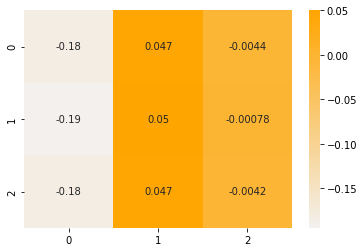

In [13]:
import seaborn as sns
htmp = sns.heatmap(atten, annot=True, cmap=sns.light_palette("orange", as_cmap=True))

### Notes on Other Common Numpy Functions

Below are some numpy functions that you might want to familiarize with, as you will most likely use or encounter them later on.

**1. `np.squeeze`, and `np.expand_dims`**

Neural models usually require inputs (or output tensors) of shape `(N, C, H, W)`, where _N_ is batch size, _C_ is channels, _H_ is height of input, and _W_ is the width. Hence, to view a 4-dim tensor of an image (for example, with _N_=1) in 3-dim numpy would require the use of `np.squeeze`. `np.expand_dims` is its opposite.

In [14]:
from PIL import Image
image = Image.open('data/car.jpg')
image = np.array(image)

print("Original image shape: {}".format(image.shape))
image = np.expand_dims(image, axis=0)
print("Expanded image at axis=0: {}".format(image.shape))
image = image.squeeze()
print("Squeezed image: {}".format(image.shape))

Original image shape: (293, 480, 3)
Expanded image at axis=0: (1, 293, 480, 3)
Squeezed image: (293, 480, 3)


**2. `np.transpose` vs `np.reshape`**

`np.transpose` permutes axes of an array.

In [15]:
image = Image.open('data/car.jpg') # PIL: (H, W, C)
image = np.array(image)
print("PIL Image: {}".format(image.shape))

image = np.expand_dims(image.transpose(2,0,1), axis=0)
print("Simulated tensor: {}".format(image.shape))

PIL Image: (293, 480, 3)
Simulated tensor: (1, 3, 293, 480)


`np.reshape` reshapes the array to a potentially new dimension, while retaining the original data within the array.

In [16]:
image = Image.open('data/car.jpg') # PIL: (H, W, C)
image = np.array(image)
print("PIL Image: {}".format(image.shape))

h, w, c = image.shape
image = image.reshape((int(h*w*c/2),2))
print("Reshaped image: {}".format(image.shape))

PIL Image: (293, 480, 3)
Reshaped image: (210960, 2)


**3. `np.concatenate`, `np.vstack`, and `np.hstack`**

`np.concatenate` combines arrays along a specified axis.

In [17]:
a1 = np.array([[0, 1],[2, 3]])
a2 = np.array([[4, 5]])

print(np.concatenate((a1, a2), axis=0))
print(np.concatenate((a1, a2.transpose()), axis=1))

[[0 1]
 [2 3]
 [4 5]]
[[0 1 4]
 [2 3 5]]


`np.vstack` combines ("stacks") array row-wise. It's similar to concatenating along `axis=0`

In [18]:
a1 = np.array([[0, 1],[2, 3]])
a2 = np.array([[4, 5]])

print(np.vstack((a1, a2)))

[[0 1]
 [2 3]
 [4 5]]


`np.hstack` combines ("stacks") array row-wise. It's similar to concatenating along `axis=1`

In [19]:
a1 = np.array([[0, 1],[2, 3]])
a2 = np.array([[4, 5]])

print(np.hstack((a1, a2.transpose())))

[[0 1 4]
 [2 3 5]]


**4. `np.flatten` vs `np.ravel`**

`np.flatten` collapses the array into 1-dim. `np.ravel` is similar to flatten, except doesn't necessarily have to be a numpy array

In [20]:
a1 = np.array([[0, 1],[2, 3]])
print(a1.flatten())

[0 1 2 3]


**5. A note on `np.copy`**

If you wish to copy initial values of an array to another, please consider using `np.copy` instead. Otherwise, any changes to your new array will also be reflected on the old one.

In [21]:
# Without using np.copy()
a1 = np.array([[0, 1],[2, 3]])
a2 = a1
print("a1 = \n{}\n\na2 = \n{}".format(a1,a2))

a2[1,:] = np.array([5, 6])
print("\nAfter copying:\n")
print("a1 = \n{}\n\na2 = \n{}".format(a1,a2))

a1 = 
[[0 1]
 [2 3]]

a2 = 
[[0 1]
 [2 3]]

After copying:

a1 = 
[[0 1]
 [5 6]]

a2 = 
[[0 1]
 [5 6]]


In [22]:
# Using np.copy()
a1 = np.array([[0, 1],[2, 3]])
a2 = a1.copy()
print("a1 = \n{}\n\na2 = \n{}".format(a1,a2))

a2[1,:] = np.array([5, 6])
print("\nAfter copying:\n")
print("a1 = \n{}\n\na2 = \n{}".format(a1,a2))

a1 = 
[[0 1]
 [2 3]]

a2 = 
[[0 1]
 [2 3]]

After copying:

a1 = 
[[0 1]
 [2 3]]

a2 = 
[[0 1]
 [5 6]]
